In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
pd.set_option('display.max_columns', None)
%matplotlib inline

In [10]:
df = pd.read_csv('data/WTA_olympics_allmerged.csv', sep = '|', lineterminator='\n')
df = df.drop('Unnamed: 0', axis = 1)
all_y = df[['Report','condition|snow', 'condition|trail','condition|bugs','condition|road']]
all_x = df.drop(['Report','condition|snow', 'condition|trail','condition|bugs','condition|road'], axis = 1)

In [19]:
all_x

,Creator,Trail,Votes,_id,Date_type,Anderson Lake State Park,Anderson Point,Appleton Pass,Aurora Creek,Baldy,...,lat,long,numReports,number_votes,url,which_pass,super_region,sub_region,total_distance,stars
0,rustysailor,Mount Rose,3.0,5af3597eacf3d6d39715ba5c,2018-05-06,0,0,0,0,0,...,47.4956,-123.2676,270,24.0,https://www.wta.org/go-hiking/hikes/mount-rose,None,Olympic Peninsula,Hood Canal,6.4,3.67
1,kilpatjw,Mount Rose,3.0,5af3597eacf3d6d39715ba5d,2018-05-05,0,0,0,0,0,...,47.4956,-123.2676,270,24.0,https://www.wta.org/go-hiking/hikes/mount-rose,None,Olympic Peninsula,Hood Canal,6.4,3.67
2,jalaugh,Mount Rose,6.0,5af3597eacf3d6d39715ba5e,2018-05-05,0,0,0,0,0,...,47.4956,-123.2676,270,24.0,https://www.wta.org/go-hiking/hikes/mount-rose,None,Olympic Peninsula,Hood Canal,6.4,3.67
3,Becuz Its There,Mount Rose,7.0,5af3597eacf3d6d39715ba5f,2018-04-25,0,0,0,0,0,...,47.4956,-123.2676,270,24.0,https://www.wta.org/go-hiking/hikes/mount-rose,None,Olympic Peninsula,Hood Canal,6.4,3.67
4,Cloud Chaser,Mount Rose,1.0,5af3597eacf3d6d39715ba60,2018-04-22,0,0,0,0,0,...,47.4956,-123.2676,270,24.0,https://www.wta.org/go-hiking/hikes/mount-rose,None,Olympic Peninsula,Hood Canal,6.4,3.67
5,StepbyStep,Mount Rose,4.0,5af3597facf3d6d39715ba62,2018-04-21,0,0,0,0,0,...,47.4956,-123.2676,270,24.0,https://www.wta.org/go-hiking/hikes/mount-rose,None,Olympic Peninsula,Hood Canal,6.4,3.67
6,tpioletti,Mount Rose,5.0,5af3597facf3d6d39715ba63,2018-04-21,0,0,0,0,0,...,47.4956,-123.2676,270,24.0,https://www.wta.org/go-hiking/hikes/mount-rose,None,Olympic Peninsula,Hood Canal,6.4,3.67
7,Irene Grinberg,Mount Rose,1.0,5af3597facf3d6d39715ba64,2018-04-20,0,0,0,0,0,...,47.4956,-123.2676,270,24.0,https://www.wta.org/go-hiking/hikes/mount-rose,None,Olympic Peninsula,Hood Canal,6.4,3.67
8,Irene Grinberg,Mount Rose,NaN,5af3597facf3d6d39715ba65,2018-04-20,0,0,0,0,0,...,47.4956,-123.2676,270,24.0,https://www.wta.org/go-hiking/hikes/mount-rose,None,Olympic Peninsula,Hood Canal,6.4,3.67
9,Nicole A,Mount Rose,5.0,5af3597facf3d6d39715ba66,2018-04-19,0,0,0,0,0,...,47.4956,-123.2676,270,24.0,https://www.wta.org/go-hiking/hikes/mount-rose,None,Olympic Peninsula,Hood Canal,6.4,3.67


In [22]:
list(all_x.columns)

['Creator',
 'Trail',
 'Votes',
 '_id',
 'Date_type',
 'Anderson Lake State Park',
 'Anderson Point',
 'Appleton Pass',
 'Aurora Creek',
 'Baldy',
 'Banner Forest',
 'Barnes Creek',
 'Big Cedar Tree - Quinault',
 'Big Creek',
 'Big Tree Trail',
 'Blue Mountain - Deer Park Snowshoe',
 'Bogachiel Peak',
 'Bogachiel River',
 'Boulder Lake (Olympics)',
 'Buckhorn Mountain',
 'Burfoot Park',
 'Cape Alava',
 'Cape Alava Loop (Ozette Triangle)',
 'Cape Flattery',
 'Capitol State Forest - Capitol Peak',
 'Capitol State Forest - McLane Creek',
 'Capitol State Forest - Mount Molly',
 'Capitol State Forest - Rock Candy Mountain',
 'Capitol State Forest - Sherman Creek Loop',
 'Cascade Rock',
 'Church Creek',
 'Clear Creek Trail',
 'Colonel Bob Trail - Colonel Bob Peak',
 'Constance Pass',
 'Copper Creek',
 'Cub Peak',
 'Deadfall',
 'Deer Park to Maiden Peak',
 'Deer Ridge',
 'Dirty Face Ridge',
 'Dodger Point',
 'Dosewallips River Road',
 'Dosewallips State Park - Steam Donkey Trail',
 'Dry Creek

In [13]:
all_y
y_snow = all_y['condition|snow']

In [48]:
x = all_x.drop(['Creator','Trail','_id', 'hike_name','url','super_region'], axis = 1)

In [61]:
x['Date_type'] = x['Date_type'].apply(lambda x: pd.to_datetime(x))
x['monthyear']

0         5-2018
1         5-2018
2         5-2018
3         4-2018
4         4-2018
5         4-2018
6         4-2018
7         4-2018
8         4-2018
9         4-2018
10        4-2018
11        4-2018
12        4-2018
13        3-2018
14        3-2018
15        3-2018
16        3-2018
17        3-2018
18        2-2018
19        2-2018
20        2-2018
21        1-2018
22        1-2018
23        1-2018
24       12-2017
25       11-2017
26       11-2017
27       10-2017
28        9-2017
29        9-2017
          ...   
12338     7-2012
12339     6-2012
12340     4-2012
12341     4-2012
12342    12-2011
12343    11-2011
12344     6-2011
12345     4-2011
12346    10-2010
12347     5-2010
12348     5-2010
12349     3-2010
12350     1-2010
12351     7-2009
12352     3-2009
12353     7-2008
12354     1-2005
12355     1-2005
12356     7-2004
12357     2-2004
12358     7-2003
12359     1-2003
12360     4-2002
12361     8-2001
12362     4-2001
12363     7-1999
12364     4-1999
12365     9-19

In [60]:
x['month'] = x['Date_type'].apply( lambda x: x.month + x.year)
x['year'] = x['Date_type'].apply( lambda x: x.year)
x['monthyear'] = x['Date_type'].apply( lambda x: str(x.month)+'-'+str(x.year))


In [67]:
month_dum = pd.get_dummies(x['month'])
year_dum = pd.get_dummies(x['year'])
monthyear_dummies = pd.get_dummies(x['monthyear'])
pass_dummies = pd.get_dummies(x['which_pass'])
subregion_dummies = pd.get_dummies(x['sub_region'])

In [102]:
all_x = pd.concat([x,monthyear_dummies,subregion_dummies], axis = 1)
final_x = all_x.drop(['Date_type','month','year','monthyear','sub_region','which_pass'], axis=1)
len(final_x.columns)

466

In [79]:
pd.options.display.max_columns = 500

In [89]:
X = final_x.fillna(0)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y_snow, test_size=0.33, random_state=22)

In [91]:
model = RandomForestClassifier()
fit = model.fit(X_train,y_train)
pred = model.predict(X_test)

In [93]:
fit.feature_importances_

array([  9.79013971e-02,   1.45951751e-06,   1.34576193e-04,
         6.91751842e-05,   0.00000000e+00,   4.15162875e-05,
         0.00000000e+00,   8.70115983e-05,   0.00000000e+00,
         3.26720991e-04,   3.48997463e-05,   2.30712856e-04,
         6.50604948e-05,   1.92425639e-04,   1.09007747e-04,
         3.73082112e-05,   0.00000000e+00,   0.00000000e+00,
         6.43870886e-04,   6.86493790e-05,   3.39016464e-05,
         1.33296472e-05,   8.71210893e-06,   0.00000000e+00,
         1.76772727e-04,   7.36805564e-05,   5.60412262e-05,
         0.00000000e+00,   9.26512139e-06,   1.29023387e-04,
         8.11368700e-05,   7.25000090e-05,   8.94522512e-05,
         6.33329456e-06,   1.36008230e-04,   0.00000000e+00,
         9.88568055e-05,   1.71057022e-04,   5.98336853e-05,
         1.55609444e-04,   3.26811762e-04,   1.11075226e-04,
         0.00000000e+00,   2.09483786e-04,   2.02833404e-04,
         0.00000000e+00,   2.67565639e-04,   5.55209342e-05,
         1.39719083e-03,

In [97]:
feature_values = {}
for i in range(len(model.feature_importances_)):
   feature_values[X.columns[i]] = model.feature_importances_[i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

[('Votes', 0.097901397130330192),
 ('highest_point', 0.024636085572260671),
 ('elevation_gain', 0.018931009192905735),
 ('numReports', 0.018173290588064758),
 ('lat', 0.017756785649355487),
 ('total_distance', 0.017566622890480478),
 ('number_votes', 0.01223636766257612),
 ('5-2017', 0.012132178454013234),
 ('7-2011', 0.011100159430451107),
 ('long', 0.011017578932148359),
 ('stars', 0.010986106873297704),
 ('5-2016', 0.010870121997614699),
 ('1-2017', 0.010867042543228875),
 ('6-2011', 0.010682135277876589),
 ('6-2017', 0.01034613763569856),
 ('7-2017', 0.0092729487341668051),
 ('5-2012', 0.0089303001024279571),
 ('Coast', 0.0084729345362955337),
 ('4-2016', 0.0084513293405917272),
 ('6-2000', 0.0082828965718938878),
 ('4-2017', 0.008128684509396987),
 ('12-2016', 0.007660299841766108),
 ('6-2016', 0.0075942882063662134),
 ('5-2015', 0.0075783178252539453),
 ('3-2018', 0.0074426635651179381),
 ('7-2012', 0.0074283226178050122),
 ('3-2013', 0.0072101969304705542),
 ('7-1999', 0.0072031

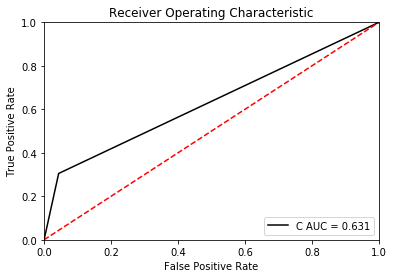

In [101]:
y_true = y_test
y_pred = model.predict(X_test)

fpr, tpr, threshold = roc_curve(y_true, y_pred)
area_under_curve = auc(fpr, tpr)

# method I: plt
fig, ax = plt.subplots()
plt.title('Receiver Operating Characteristic')
ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

ax.legend(loc = 'lower right')
ax.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [4]:
df_w = pd.read_csv('data/WTA_olympics_merged_yearlyweather', sep = '|',lineterminator='\n')

In [5]:
df_w.head()

,Unnamed: 0,Creator,Report,Trail,Votes,_id,condition|snow,condition|trail,condition|bugs,condition|road,...,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WDFG,WSF2,WSF5,WSFG
0,0,rustysailor,Arrived at the trailhead at about 11am to find...,Mount Rose,3.0,5af3597eacf3d6d39715ba5c,True,True,False,False,...,49.4,57.6,41.1,NaN,150.0,160.0,NaN,35.1,53.9,NaN
1,1,kilpatjw,Got to the trailhead at around 9am and the lot...,Mount Rose,3.0,5af3597eacf3d6d39715ba5d,False,True,False,False,...,49.4,57.6,41.1,NaN,150.0,160.0,NaN,35.1,53.9,NaN
2,2,jalaugh,Shortly after the very well marked summit loop...,Mount Rose,6.0,5af3597eacf3d6d39715ba5e,True,True,False,False,...,49.4,57.6,41.1,NaN,150.0,160.0,NaN,35.1,53.9,NaN
3,3,Becuz Its There,Made another mad dash up Rose for training. T...,Mount Rose,7.0,5af3597eacf3d6d39715ba5f,True,True,False,False,...,49.4,57.6,41.1,NaN,150.0,160.0,NaN,35.1,53.9,NaN
4,4,Cloud Chaser,"My wife, dog & I headed up Mt Rose this weeken...",Mount Rose,1.0,5af3597eacf3d6d39715ba60,False,True,False,False,...,49.4,57.6,41.1,NaN,150.0,160.0,NaN,35.1,53.9,NaN


In [7]:
all_y = df_w[['Report','condition|snow', 'condition|trail','condition|bugs','condition|road']]
all_x = df_w.drop(['Report','condition|snow', 'condition|trail','condition|bugs','condition|road'], axis = 1)

In [8]:
y_snow = all_y['condition|snow']

In [11]:
all_x

,Unnamed: 0,Creator,Trail,Votes,_id,Anderson Lake State Park,Anderson Point,Appleton Pass,Aurora Creek,Baldy,Banner Forest,Barnes Creek,Big Cedar Tree - Quinault,Big Creek,Big Tree Trail,Blue Mountain - Deer Park Snowshoe,Bogachiel Peak,Bogachiel River,Boulder Lake (Olympics),Buckhorn Mountain,Burfoot Park,Cape Alava,Cape Alava Loop (Ozette Triangle),Cape Flattery,Capitol State Forest - Capitol Peak,Capitol State Forest - McLane Creek,Capitol State Forest - Mount Molly,Capitol State Forest - Rock Candy Mountain,Capitol State Forest - Sherman Creek Loop,Cascade Rock,Church Creek,Clear Creek Trail,Colonel Bob Trail - Colonel Bob Peak,Constance Pass,Copper Creek,Cub Peak,Deadfall,Deer Park to Maiden Peak,Deer Ridge,Dirty Face Ridge,Dodger Point,Dosewallips River Road,Dosewallips State Park - Steam Donkey Trail,Dry Creek,Duckabush River,Dungeness Spit,Eagle Point Snowshoe,Elbo Creek,Elk Lakes,Elk Mountain to Maiden Peak,Elwha River and Geyser Valley,Elwha River and Lillian River,Elwha To Hurricane Hill,Fallsview Canyon (Falls View),Fletcher Canyon,Fort Flagler State Park,Foulweather Bluff Preserve Trail,Gibbs Lake,Gladys Divide,Glines Canyon Overlook Trail,Gold Mountain,Grand Ridge,Grand Valley,Grand Valley via Grand Pass Trail,Graves Creek,Green Mountain - Gold Creek Trail,Green Mountain - Wildcat Trail,Griff Creek,Guillemot Cove,Hall of Mosses,Hansville Greenway,Happy Lake Ridge,Harstine Island State Park,Heart O' the Forest,Heather Creek Trail via Upper Dungeness River,Heather Park,High Divide - Seven Lakes Basin Loop,Hoh River Trail to Blue Glacier,Hoh River Trail to Five Mile Island,Home Lake,Hurricane Hill,Hurricane Ridge Snowshoe,Illahee Forest Preserve,Indian Island County Park,Jefferson Ridge,Kalaloch - Browns Point,Kalaloch Creek Nature Trail,Kestner Homestead,Klahhane Ridge,Klahhane Ridge Snowshoe,Kloshe Nanitch,Kopachuck State Park Trail,Lake Angeles,Lake Constance,Lake of the Angels,Lena Lake,Lena Lake - Valley of Silent Men Snowshoe,Lightning Peak,Lillian Ridge,Lillian River,Little Quilcene River,Lower Big Quilcene River,Lower Dungeness River,Lower Gray Wolf River,Lower Pete's Creek,Lower South Fork Skokomish River,Marmot Pass - Upper Big Quilcene,Marmot Pass via Upper Dungeness River Trail,Mary E. Theler Wetlands Nature Preserve,Marymere Falls,McCormick Forest Park,Mildred Lakes,Miller Peninsula-Thompson Spit,Millersylvania State Park,Mima Mounds,Mink Lake,Mink Lake to Little Divide,Mount Angeles,Mount Angeles Snowshoe,Mount Ellinor,Mount Jupiter,Mount Muller,Mount Rose,Mount Storm King,Mount Townsend,Mount Townsend - Silver Lakes Traverse,Mount Townsend Snowshoe,Mount Walker,Mount Zion,Murhut Falls,Ned Hill,Newberry Hill Heritage Park,North Coast Route,North Fork Quinault River and Halfway House,North Fork Skokomish River,North Fork Skokomish River and Flapjack Lakes,North Fork Sol Duc River,Notch Pass,Olympic Hot Springs,PJ Lake,Peabody Creek Trail,Penrose Point State Park,Pete's Creek - Colonel Bob Peak,Priest Point Park,Pyramid Mountain / Pyramid Peak,Queets Campground Loop,Queets River,Quillayute River Slough,Quinault National Recreation Trails,Quinault River-Pony Bridge-Enchanted Valley,Rain Shadow Loop,Ranger Hole - Interrorem Nature Trail,Royal Basin - Royal Lake,Ruby Beach,Second Beach,Shi Shi Beach and Point of the Arches,Silver Lakes,Six Ridge,Slab Camp Creek and Gray Wolf River,Smokey Bottom (West Lake Mills),Snider-Jackson Traverse,Sol Duc Falls,South Coast Wilderness Trail - Toleak Point,South Fork Hoh River - Big Flat,Spider Lake,Spoon Creek Falls,Spruce Railroad Trail,Staircase Rapids,Striped Peak,Sunnybrook Meadows,Switchback,The Brothers,Third Beach,Three Lakes,Tubal Cain Mine,Tubal Cain Mine to Buckhorn Lake,Tumwater Falls Park,Tunnel Creek,Tunnel Creek - Dosewallips Trailhead,Twanoh State Park,Upper Dungeness River,Upper Lena Lake,Upper South Fork Skokomish River,Valhalla Peak,Wagonwheel Lake,Watershed Park,Welch Peaks,West Elwha,West Fork Dosewallips River,West Fork Humptulips River,Westport Sta

In [37]:
def pred_x(all_x):
    all_x.drop(['Creator','Trail','_id', 'hike_name','url','super_region'], axis = 1)
    all_x['Datetime'] = all_x['Datetime'].apply(lambda x: pd.to_datetime(x))
    all_x['month'] = all_x['Datetime'].apply( lambda x: x.month + x.year)
    all_x['year'] = all_x['Datetime'].apply( lambda x: x.year)
    all_x['monthyear'] = all_x['Datetime'].apply( lambda x: str(x.month)+'-'+str(x.year))
    month_dum = pd.get_dummies(all_x['month'])
    year_dum = pd.get_dummies(all_x['year'])
    monthyear_dummies = pd.get_dummies(all_x['monthyear'])
    pass_dummies = pd.get_dummies(all_x['which_pass'])
    subregion_dummies = pd.get_dummies(all_x['sub_region'])
    dummy_x = pd.concat([all_x,monthyear_dummies,subregion_dummies], axis = 1)
    final_x = dummy_x.drop(['Unnamed: 0','Date_type','month','year','monthyear','sub_region','which_pass','Datetime','last_year','closet_station','Creator','Trail','_id', 'hike_name','url','super_region','LATITUDE','LONGITUDE'], axis=1)
    X = final_x.fillna(0)
    return X

In [36]:
X = pred_x(all_x)
X

,Votes,Anderson Lake State Park,Anderson Point,Appleton Pass,Aurora Creek,Baldy,Banner Forest,Barnes Creek,Big Cedar Tree - Quinault,Big Creek,Big Tree Trail,Blue Mountain - Deer Park Snowshoe,Bogachiel Peak,Bogachiel River,Boulder Lake (Olympics),Buckhorn Mountain,Burfoot Park,Cape Alava,Cape Alava Loop (Ozette Triangle),Cape Flattery,Capitol State Forest - Capitol Peak,Capitol State Forest - McLane Creek,Capitol State Forest - Mount Molly,Capitol State Forest - Rock Candy Mountain,Capitol State Forest - Sherman Creek Loop,Cascade Rock,Church Creek,Clear Creek Trail,Colonel Bob Trail - Colonel Bob Peak,Constance Pass,Copper Creek,Cub Peak,Deadfall,Deer Park to Maiden Peak,Deer Ridge,Dirty Face Ridge,Dodger Point,Dosewallips River Road,Dosewallips State Park - Steam Donkey Trail,Dry Creek,Duckabush River,Dungeness Spit,Eagle Point Snowshoe,Elbo Creek,Elk Lakes,Elk Mountain to Maiden Peak,Elwha River and Geyser Valley,Elwha River and Lillian River,Elwha To Hurricane Hill,Fallsview Canyon (Falls View),Fletcher Canyon,Fort Flagler State Park,Foulweather Bluff Preserve Trail,Gibbs Lake,Gladys Divide,Glines Canyon Overlook Trail,Gold Mountain,Grand Ridge,Grand Valley,Grand Valley via Grand Pass Trail,Graves Creek,Green Mountain - Gold Creek Trail,Green Mountain - Wildcat Trail,Griff Creek,Guillemot Cove,Hall of Mosses,Hansville Greenway,Happy Lake Ridge,Harstine Island State Park,Heart O' the Forest,Heather Creek Trail via Upper Dungeness River,Heather Park,High Divide - Seven Lakes Basin Loop,Hoh River Trail to Blue Glacier,Hoh River Trail to Five Mile Island,Home Lake,Hurricane Hill,Hurricane Ridge Snowshoe,Illahee Forest Preserve,Indian Island County Park,Jefferson Ridge,Kalaloch - Browns Point,Kalaloch Creek Nature Trail,Kestner Homestead,Klahhane Ridge,Klahhane Ridge Snowshoe,Kloshe Nanitch,Kopachuck State Park Trail,Lake Angeles,Lake Constance,Lake of the Angels,Lena Lake,Lena Lake - Valley of Silent Men Snowshoe,Lightning Peak,Lillian Ridge,Lillian River,Little Quilcene River,Lower Big Quilcene River,Lower Dungeness River,Lower Gray Wolf River,Lower Pete's Creek,Lower South Fork Skokomish River,Marmot Pass - Upper Big Quilcene,Marmot Pass via Upper Dungeness River Trail,Mary E. Theler Wetlands Nature Preserve,Marymere Falls,McCormick Forest Park,Mildred Lakes,Miller Peninsula-Thompson Spit,Millersylvania State Park,Mima Mounds,Mink Lake,Mink Lake to Little Divide,Mount Angeles,Mount Angeles Snowshoe,Mount Ellinor,Mount Jupiter,Mount Muller,Mount Rose,Mount Storm King,Mount Townsend,Mount Townsend - Silver Lakes Traverse,Mount Townsend Snowshoe,Mount Walker,Mount Zion,Murhut Falls,Ned Hill,Newberry Hill Heritage Park,North Coast Route,North Fork Quinault River and Halfway House,North Fork Skokomish River,North Fork Skokomish River and Flapjack Lakes,North Fork Sol Duc River,Notch Pass,Olympic Hot Springs,PJ Lake,Peabody Creek Trail,Penrose Point State Park,Pete's Creek - Colonel Bob Peak,Priest Point Park,Pyramid Mountain / Pyramid Peak,Queets Campground Loop,Queets River,Quillayute River Slough,Quinault National Recreation Trails,Quinault River-Pony Bridge-Enchanted Valley,Rain Shadow Loop,Ranger Hole - Interrorem Nature Trail,Royal Basin - Royal Lake,Ruby Beach,Second Beach,Shi Shi Beach and Point of the Arches,Silver Lakes,Six Ridge,Slab Camp Creek and Gray Wolf River,Smokey Bottom (West Lake Mills),Snider-Jackson Traverse,Sol Duc Falls,South Coast Wilderness Trail - Toleak Point,South Fork Hoh River - Big Flat,Spider Lake,Spoon Creek Falls,Spruce Railroad Trail,Staircase Rapids,Striped Peak,Sunnybrook Meadows,Switchback,The Brothers,Third Beach,Three Lakes,Tubal Cain Mine,Tubal Cain Mine to Buckhorn Lake,Tumwater Falls Park,Tunnel Creek,Tunnel Creek - Dosewallips Trailhead,Twanoh State Park,Upper Dungeness River,Upper Lena Lake,Upper South Fork Skokomish River,Valhalla Peak,Wagonwheel Lake,Watershed Park,Welch Peaks,West Elwha,West Fork Dosewallips River,West Fork Humptulips River,Westport State Park - Westport Light Trai

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_snow, test_size=0.33, random_state=22)

In [27]:
model = RandomForestClassifier()
fit = model.fit(X_train,y_train)
pred = model.predict(X_test)

ValueError: could not convert string to float: 'Olympic Peninsula'